<a href="https://colab.research.google.com/github/Mojisola1302/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Formulation
The goal of this project is to build a machine learning model that can accurately predict whether a loan application will be approved or not. Given a set of loan application data, including information about the applicant's income, employment history, credit score, and loan amount, the model will be able to determine the likelihood of loan approval.

The problem can be framed as a binary classification task, where the target variable is a binary outcome indicating whether the loan application was approved (1) or not (0). The input features can include:

Personal Information:  Gender, Marital Status, Education, Employment, No of Dependant.

Financial Information: Income, Loan Amount, Credit History

Loan Information: Loan Term

The model should be trained on a historical dataset of loan applications and their outcomes. The performance of the model will be evaluated based on its ability to accurately predict loan approval on a held-out test dataset.

The primary metric used for evaluation will be the accuracy of the model, but other metrics such as precision, recall, and F1 score may also be considered. The ultimate goal is to develop a model that can be used by financial institutions to make informed decisions about loan approvals, reducing the risk of default and improving the overall loan process for applicants.

# Packages and Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Hide warnings returned by cross validation.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data
import urllib.request

train_data_path = "https://github.com/naveen-chauhan/Loan-Prediction-Classification/raw/master/Dataset/train.csv"
test_data_path = "https://github.com/naveen-chauhan/Loan-Prediction-Classification/raw/master/Dataset/test.csv"

def loan_data(path):

  """
  Retrieving data from the data paths, read data as a pandas framework

  And return the dataframe
  """

  data_path = urllib.request.urlretrieve(path)[0]
  loan_data = pd.read_csv((data_path), on_bad_lines='skip')

  return loan_data

In [3]:
loan_train = loan_data(train_data_path)
loan_train.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_test  = loan_data(test_data_path)
loan_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
loan_train.shape

(614, 13)

In [6]:
loan_test.shape

(367, 12)

# Exploratory Data Analysis

In [7]:
#Checking data info
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Checking data statistics
loan_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


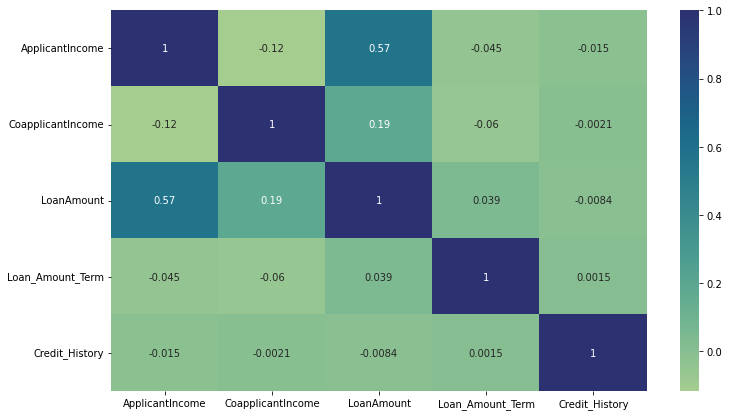

In [99]:
#Checking and visualising correlation
corr= loan_train.corr()


plt.figure(figsize=(12,7))

sns.heatmap(corr,annot=True,cmap="crest")

In [10]:
# Checking missing values
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Credit History of Loan Applicants')

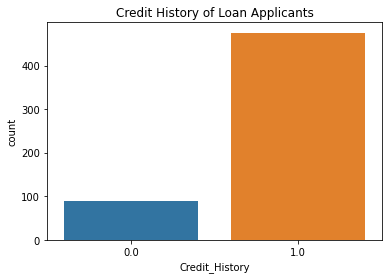

In [12]:
sns.countplot(loan_train['Credit_History'])
plt.title('Credit History of Loan Applicants')

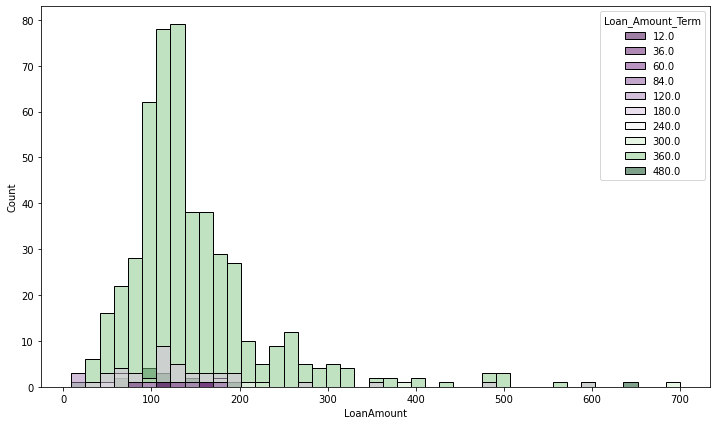

In [13]:
plt.figure(figsize=(12,7))

sns.histplot(data=loan_train, x='LoanAmount', palette='PRGn', hue='Loan_Amount_Term')

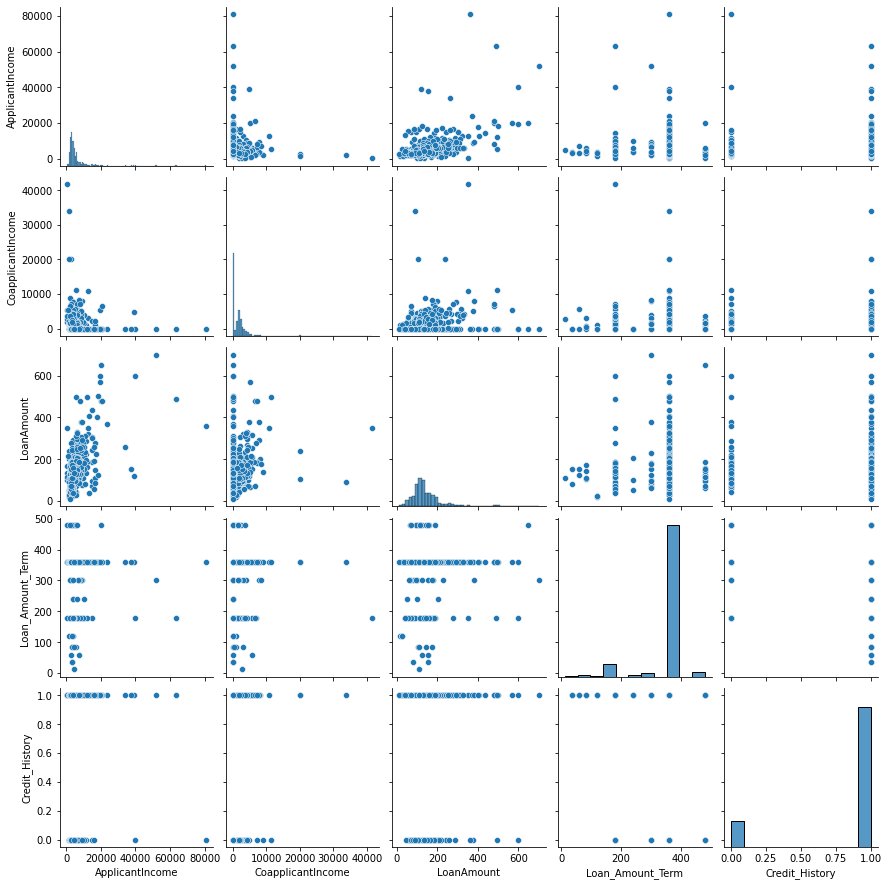

In [14]:
sns.pairplot(loan_train)

# Data Preprocessing

In [91]:
# Categorical features
loan_training_data = loan_train.drop(columns = "Loan_Status",axis = 0)
training_labels = loan_train["Loan_Status"]
cat_feats = loan_train[["Dependents","Gender", "Married", "Education", "Self_Employed", "Property_Area"]]
num_feats = loan_train[["ApplicantIncome", "CoapplicantIncome","LoanAmount", "Loan_Amount_Term", "Credit_History"]]

In [16]:
# Filling missing values

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy = "mean")),
    ("scaler", StandardScaler())

  ])
num_preprocessed = num_pipe.fit_transform(num_feats)

In [17]:
# Pipeline to combine the numerical pipeline and also encode categorical features 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

#num_cat_list = (zip(num_list,cat_list))
#training_input_data = np.array(num_cat_list)


final_pipe = ColumnTransformer([
     ('num', num_pipe, num_list),
     ('cat', OneHotEncoder(), cat_list)
])
training_data_preprocessed = final_pipe.fit_transform(loan_train)

In [18]:
training_data_preprocessed

array([[ 0.07299082, -0.55448733,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.03873155, -0.21927331, ...,  1.        ,
         0.        ,  0.        ],
       [-0.39374734, -0.55448733, -0.957641  , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.35706382, -0.55448733,  0.4833669 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.55448733, -0.15972753, ...,  0.        ,
         1.        ,  0.        ]])

# Training Models

In [19]:
# Logistic Regression for CLassification
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(training_data_preprocessed, training_labels)

LogisticRegression()

In [20]:
#Trying SDG Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(training_data_preprocessed, training_labels)

SGDClassifier()

In [90]:
# Trying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_data_preprocessed, training_labels)

DecisionTreeClassifier()

In [92]:
# Trying linear SVM
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()
lin_svc.fit(training_data_preprocessed, training_labels)

LinearSVC()

In [39]:
# Trying nonlinear SVM
from sklearn.svm import SVC

poly_svc = SVC(kernel= "poly")
poly_svc.fit(training_data_preprocessed, training_labels)

SVC(kernel='poly')

In [101]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

forest_clf.fit(training_data_preprocessed, training_labels)

RandomForestClassifier()

# Training Ensemble Classifiers

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

log_classifier =  LogisticRegression()
sv_classifier = SVC()
sgd_classifier = SGDClassifier()

def classifiers(clf1, clf2, clf3, training_data_preprocessed, training_labels):
    
    """
    A function that takes 5 inputs: 3 classifiers, training data & labels
    And return the list of accuracies on all classifiers
    
    """
    
    # A list of all classifiers
    clfs = [clf1, clf2, clf3]
    
    # An empty list to comprehend 
    all_clfs_acc = []
    
    # Train each classifier, evaluate it on the training set 
    # And append the accuracy to 'all_clfs_acc' 
    
    for clf in clfs:
        
        clf.fit(training_data_preprocessed, training_labels)
        preds = clf.predict(training_data_preprocessed)
        acc = accuracy_score(training_labels,preds)
        acc = acc.tolist()
        all_clfs_acc.append(acc)
        
    return all_clfs_acc

In [111]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(
    
    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)], 
    voting='hard')

vot_classifier.fit(training_data_preprocessed, training_labels)

VotingClassifier(estimators=[('log_reg', LogisticRegression()), ('svc', SVC()),
                             ('sgd', SGDClassifier())])

# Model Evaluation

In [61]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds 

log_scores = cross_val_score(log_model, training_data_preprocessed, training_labels,
                         cv=10)

In [62]:
log_scores

array([0.79032258, 0.82258065, 0.74193548, 0.77419355, 0.7704918 ,
       0.78688525, 0.86885246, 0.86885246, 0.80327869, 0.83606557])

In [63]:
log_scores.mean()

0.8063458487572712

In [64]:
sgd_scores = cross_val_score(sgd_clf, training_data_preprocessed, training_labels,
                         cv=10)

In [60]:
sgd_scores

array([0.51612903, 0.80645161, 0.70967742, 0.67741935, 0.50819672,
       0.78688525, 0.83606557, 0.78688525, 0.73770492, 0.80327869])

In [43]:
sgd_scores.mean()

0.7184294024325754

In [44]:
tree_scores = cross_val_score(tree_clf, training_data_preprocessed, training_labels,
                         cv=10)

In [30]:
tree_scores

array([0.72580645, 0.74193548, 0.70967742, 0.66129032, 0.68852459,
       0.75409836, 0.7704918 , 0.70491803, 0.6557377 , 0.80327869])

In [31]:
tree_scores.mean()

0.7215758857747223

In [65]:
lin_svc_scores = cross_val_score(lin_svc, training_data_preprocessed, training_labels,
                         cv=10)

In [66]:
lin_svc_scores

array([0.80645161, 0.82258065, 0.75806452, 0.75806452, 0.78688525,
       0.78688525, 0.86885246, 0.85245902, 0.81967213, 0.83606557])

In [67]:
lin_svc_scores.mean()

0.8095980962453728

In [48]:
poly_svc_scores = cross_val_score(poly_svc, training_data_preprocessed, training_labels,
                         cv=10)


In [68]:
poly_svc_scores

array([0.79032258, 0.83870968, 0.70967742, 0.74193548, 0.7704918 ,
       0.83606557, 0.8852459 , 0.83606557, 0.73770492, 0.85245902])

In [50]:
poly_svc_scores.mean()

0.7998677948175568

In [102]:
forest_clf_scores = cross_val_score(forest_clf, training_data_preprocessed, training_labels,
                         cv=10)

In [103]:
forest_clf_scores

array([0.79032258, 0.77419355, 0.70967742, 0.74193548, 0.7704918 ,
       0.78688525, 0.78688525, 0.7704918 , 0.75409836, 0.80327869])

In [104]:
forest_clf_scores.mean()

0.7688260179799047

In [116]:
vot_classifier_scores = cross_val_score(vot_classifier, training_data_preprocessed, training_labels,
                         cv=10)

In [117]:
vot_classifier_scores

array([0.80645161, 0.82258065, 0.74193548, 0.77419355, 0.78688525,
       0.78688525, 0.86885246, 0.86885246, 0.80327869, 0.83606557])

In [118]:
vot_classifier_scores.mean()

0.8095980962453726

In [125]:
#Performance matrix

from sklearn.metrics import confusion_matrix

lin_pred = lin_svc.predict(training_data_preprocessed)
vot_pred = vot_classifier.predict(training_data_preprocessed)


In [126]:
confusion_matrix(training_labels, lin_pred)

array([[ 83, 109],
       [  8, 414]])

In [127]:
confusion_matrix(training_labels, vot_pred)

array([[ 85, 107],
       [  6, 416]])

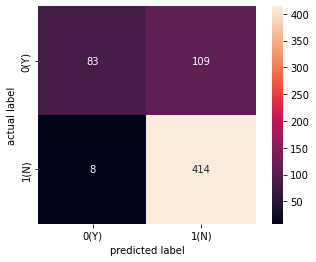

In [128]:
cm = confusion_matrix(training_labels, lin_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Y)', '1(N)'],
                        yticklabels=['0(Y)', '1(N)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, lin_pred)

0.8127035830618893

In [119]:
def accuracy(model, data, labels):
    
    predictions = model.predict(data)
    acc = accuracy_score(labels, predictions)
    
    return acc

In [122]:
accuracy(vot_classifier, training_data_preprocessed, training_labels)

0.8159609120521173

In [71]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, lin_pred))

              precision    recall  f1-score   support

           N       0.92      0.44      0.59       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614

